In [1]:
import numpy as np

In [3]:

import torch


import matplotlib.pyplot as plt

In [4]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(type(images))


<class 'torch.Tensor'>


In [6]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


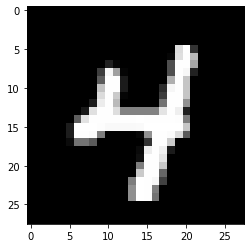

In [7]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [18]:
images[1].numpy().squeeze().shape

(28, 28)

In [17]:
images[1].numpy().shape

(1, 28, 28)

In [43]:
def activation(x):
    return 1/(1+torch.exp(-x))

input=784
output=10
hidden=256
batch_size=64

W1=torch.randn(input,hidden)
W2=torch.randn(hidden,output)
B1=torch.randn(1,hidden)
B2=torch.randn(1,output)

In [44]:
img_reshape=images.view(batch_size,-1)
img_reshape.shape

torch.Size([64, 784])

In [45]:
output=torch.mm(activation(torch.mm(img_reshape,W1)+B1),W2)+B2

In [46]:
output.shape

torch.Size([64, 10])

In [47]:
output

tensor([[ 7.7623e+00,  3.3379e+00,  9.5813e+00, -6.5258e+00,  4.8200e+00,
          3.6789e+00,  2.9357e+00,  1.1601e+01, -7.5396e+00,  3.7246e+00],
        [ 2.0338e+01,  7.9908e+00,  1.1539e+01, -1.0489e+01,  2.9900e+00,
          9.9792e+00,  5.3796e+00, -1.8266e+00, -1.0127e+01,  2.8361e+00],
        [ 1.7160e+01,  6.6906e+00,  1.5226e+01, -1.1991e+01,  9.8029e-01,
          1.0557e+01, -4.3514e+00,  6.7763e+00, -4.4468e+00,  3.1612e+00],
        [ 9.5179e+00,  7.5503e+00,  1.4550e+01, -6.8682e+00, -4.0116e-01,
          9.5549e+00, -1.1655e+01,  7.0761e+00, -7.8170e+00,  2.7457e+00],
        [ 4.0156e+00,  5.1594e+00,  6.4743e+00, -3.2242e+00, -1.2712e+00,
          1.0276e+01,  1.6850e+00,  5.5610e+00, -5.5052e-01,  5.8074e+00],
        [ 3.8962e+00,  2.6180e+00,  7.1597e+00, -1.4884e+00, -4.9346e+00,
          3.7040e-01,  4.5633e+00,  1.0215e+01, -7.7291e+00,  1.1962e+00],
        [ 1.0695e+01,  7.2770e+00,  1.7277e+01, -9.4776e+00,  5.6748e+00,
          1.7263e+01, -6.3791e+0

In [34]:
m=output

In [53]:
torch.sum(torch.exp(output[1])/torch.sum(torch.exp(output[1])))

tensor(1.0000)

In [54]:
torch.exp(output)

tensor([[2.3504e+03, 2.8159e+01, 1.4492e+04, 1.4652e-03, 1.2397e+02, 3.9603e+01,
         1.8836e+01, 1.0917e+05, 5.3163e-04, 4.1455e+01],
        [6.8031e+08, 2.9538e+03, 1.0268e+05, 2.7845e-05, 1.9886e+01, 2.1573e+04,
         2.1694e+02, 1.6096e-01, 3.9995e-05, 1.7049e+01],
        [2.8342e+07, 8.0478e+02, 4.0994e+06, 6.2008e-06, 2.6652e+00, 3.8441e+04,
         1.2888e-02, 8.7686e+02, 1.1716e-02, 2.3599e+01],
        [1.3602e+04, 1.9014e+03, 2.0847e+06, 1.0404e-03, 6.6954e-01, 1.4114e+04,
         8.6726e-06, 1.1834e+03, 4.0285e-04, 1.5576e+01],
        [5.5455e+01, 1.7406e+02, 6.4828e+02, 3.9787e-02, 2.8049e-01, 2.9029e+04,
         5.3925e+00, 2.6007e+02, 5.7665e-01, 3.3276e+02],
        [4.9213e+01, 1.3708e+01, 1.2865e+03, 2.2573e-01, 7.1933e-03, 1.4483e+00,
         9.5901e+01, 2.7310e+04, 4.3983e-04, 3.3076e+00],
        [4.4142e+04, 1.4466e+03, 3.1849e+07, 7.6551e-05, 2.9144e+02, 3.1427e+07,
         1.6966e-03, 3.8615e+07, 1.8905e-05, 1.2021e+05],
        [8.0891e+00, 1.9883

In [66]:
def softmax(output):
    return torch.exp(output)/torch.sum(torch.exp(output),dim=1).view(-1,1)  # Important to understand (broadcasting)
    

In [67]:
prob=softmax(output)
print(prob.shape)
print(torch.sum(prob,dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [10]:
from torch import nn

In [69]:
class Network(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        
        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)
        
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x

In [70]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [71]:
class Network(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        
        self.hid1=nn.Linear(784,128)
        self.hid2=nn.Linear(128,64)
        self.output=nn.Linear(64,10)
        
        self.Relu=nn.ReLU()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        
        x=self.hid1(x)
        x=self.Relu(x)
        x=self.hid2(x)
        x=self.Relu(x)
        x=self.softmax(x)
        
        return x

In [72]:
model=Network()
model

Network(
  (hid1): Linear(in_features=784, out_features=128, bias=True)
  (hid2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [81]:
import torch.nn.functional as F
from torchvision import datasets,transforms

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [82]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [83]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()

images,labels= next(iter(trainloader))

images=images.view(images.shape[0],-1)

logits=model(images)

loss=criterion(logits,labels)

print(loss)

tensor(2.3137, grad_fn=<NllLossBackward>)


## AUTOGRAD

In [85]:
x=torch.randn(2,2,requires_grad=True)
print(x)

tensor([[ 0.0856, -0.1283],
        [ 0.0835,  1.0771]], requires_grad=True)


In [86]:
y=x**2
y

tensor([[0.0073, 0.0165],
        [0.0070, 1.1600]], grad_fn=<PowBackward0>)

In [87]:
print(y.grad_fn)

In [91]:
z=y.mean()
z

tensor(0.2977, grad_fn=<MeanBackward0>)

In [90]:
print(z.grad_fn)

In [92]:
print(x.grad)

None


In [93]:
z.backward()

In [94]:
print(x.grad)

tensor([[ 0.0428, -0.0642],
        [ 0.0418,  0.5385]])


In [95]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()

images,labels= next(iter(trainloader))

images=images.view(images.shape[0],-1)

logps=model(images)

loss=criterion(logps,labels)

In [96]:
model


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [99]:
model[0].weight.shape

torch.Size([128, 784])

In [100]:
loss.backward()

In [101]:
print(model[0].weight.grad)

tensor([[-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [102]:
print(model[0].weight.grad.shape)

torch.Size([128, 784])


In [103]:
from torch import optim

In [104]:
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [106]:
optimizer.step()

In [108]:
model[0].weight

Parameter containing:
tensor([[-0.0065, -0.0185, -0.0166,  ...,  0.0171, -0.0085,  0.0246],
        [ 0.0154,  0.0256, -0.0127,  ..., -0.0021,  0.0077, -0.0210],
        [ 0.0034,  0.0268,  0.0094,  ...,  0.0180, -0.0124, -0.0263],
        ...,
        [-0.0003,  0.0157, -0.0263,  ..., -0.0240, -0.0153,  0.0241],
        [-0.0156,  0.0049, -0.0188,  ...,  0.0114,  0.0170,  0.0281],
        [ 0.0242,  0.0011, -0.0210,  ...,  0.0072,  0.0353, -0.0247]],
       requires_grad=True)

In [112]:
optimizer.zero_grad()
images=images.view(images.shape[0],-1)

logps=model.forward(images)

loss=criterion(logps,labels)

In [113]:
loss.backward()
optimizer.step()

In [114]:
model[0].weight

Parameter containing:
tensor([[-0.0065, -0.0185, -0.0166,  ...,  0.0171, -0.0085,  0.0247],
        [ 0.0153,  0.0255, -0.0127,  ..., -0.0021,  0.0077, -0.0210],
        [ 0.0034,  0.0267,  0.0094,  ...,  0.0180, -0.0124, -0.0263],
        ...,
        [-0.0003,  0.0157, -0.0263,  ..., -0.0239, -0.0153,  0.0241],
        [-0.0156,  0.0049, -0.0188,  ...,  0.0114,  0.0170,  0.0281],
        [ 0.0242,  0.0011, -0.0210,  ...,  0.0072,  0.0353, -0.0247]],
       requires_grad=True)

In [132]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()

images,labels= next(iter(trainloader))

images=images.view(images.shape[0],-1)



In [133]:
loss

tensor(2.3057, grad_fn=<NllLossBackward>)

In [136]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0133, -0.0038,  0.0311,  ...,  0.0177,  0.0043, -0.0326],
        [ 0.0280, -0.0051, -0.0006,  ...,  0.0168, -0.0141,  0.0040],
        [-0.0126,  0.0007,  0.0285,  ..., -0.0213, -0.0194, -0.0266],
        ...,
        [ 0.0327, -0.0217,  0.0242,  ..., -0.0206,  0.0218, -0.0302],
        [-0.0326, -0.0322, -0.0048,  ..., -0.0083,  0.0273,  0.0327],
        [ 0.0122,  0.0259, -0.0328,  ...,  0.0108,  0.0308, -0.0039]],
       requires_grad=True)
Gradient - tensor([[ 5.2810e-04,  5.2810e-04,  5.2810e-04,  ...,  5.2810e-04,
          5.2810e-04,  5.2810e-04],
        [ 5.5118e-05,  5.5118e-05,  5.5118e-05,  ...,  5.5118e-05,
          5.5118e-05,  5.5118e-05],
        [-3.0358e-03, -3.0358e-03, -3.0358e-03,  ..., -3.0358e-03,
         -3.0358e-03, -3.0358e-03],
        ...,
        [-4.2634e-04, -4.2634e-04, -4.2634e-04,  ..., -4.2634e-04,
         -4.2634e-04, -4.2634e-04],
        [ 3.8263e-06,  3.8263e-06,  3.8263e-06,  ...,  3.8263e

In [137]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0133, -0.0038,  0.0311,  ...,  0.0177,  0.0043, -0.0326],
        [ 0.0280, -0.0051, -0.0006,  ...,  0.0168, -0.0141,  0.0040],
        [-0.0126,  0.0007,  0.0285,  ..., -0.0213, -0.0194, -0.0266],
        ...,
        [ 0.0327, -0.0217,  0.0242,  ..., -0.0206,  0.0218, -0.0302],
        [-0.0326, -0.0322, -0.0048,  ..., -0.0083,  0.0273,  0.0327],
        [ 0.0122,  0.0259, -0.0328,  ...,  0.0108,  0.0308, -0.0039]],
       requires_grad=True)


In [138]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [128]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013]])


In [9]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

NameError: name 'model' is not defined

In [130]:

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0303, -0.0244, -0.0023,  ...,  0.0008,  0.0349,  0.0341],
        [-0.0084,  0.0197,  0.0331,  ..., -0.0102, -0.0208, -0.0183],
        [ 0.0185, -0.0199,  0.0064,  ..., -0.0063, -0.0104, -0.0237],
        ...,
        [ 0.0048, -0.0214, -0.0080,  ...,  0.0345, -0.0297,  0.0005],
        [-0.0049, -0.0287, -0.0023,  ...,  0.0301,  0.0098,  0.0202],
        [ 0.0013,  0.0331,  0.0166,  ...,  0.0260,  0.0251, -0.0070]],
       requires_grad=True)
Gradient - tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010]])


In [131]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0303, -0.0244, -0.0023,  ...,  0.0008,  0.0349,  0.0341],
        [-0.0085,  0.0197,  0.0331,  ..., -0.0102, -0.0208, -0.0184],
        [ 0.0185, -0.0199,  0.0063,  ..., -0.0063, -0.0104, -0.0237],
        ...,
        [ 0.0048, -0.0214, -0.0080,  ...,  0.0345, -0.0298,  0.0005],
        [-0.0049, -0.0287, -0.0023,  ...,  0.0301,  0.0098,  0.0202],
        [ 0.0013,  0.0331,  0.0166,  ...,  0.0260,  0.0252, -0.0070]],
       requires_grad=True)


In [16]:
from torch import optim
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
images,labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)

logits=model(images)

loss=criterion(logits,labels)
print(loss)

tensor(2.2941, grad_fn=<NllLossBackward>)


In [17]:
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [30]:
print('Initial weight -',model[0].weight)
images,labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)

optimizer.zero_grad()

output=model.forward(images)

loss=criterion(output,labels)

loss.backward()
print('Gradient -',model[0].weight.grad)

Initial weight - Parameter containing:
tensor([[ 1.8434e-02, -2.6530e-02, -7.5079e-03,  ...,  2.9798e-02,
         -2.2629e-02,  8.0181e-03],
        [ 1.5275e-02, -1.7209e-02, -1.4633e-02,  ..., -2.9638e-02,
          5.0455e-03, -1.3379e-02],
        [ 3.2213e-02, -1.6221e-02,  3.4404e-02,  ..., -6.0480e-06,
         -2.3350e-02, -1.0324e-02],
        ...,
        [ 1.4652e-02, -2.6084e-02, -7.2943e-03,  ..., -3.4590e-02,
         -9.3281e-03,  1.8467e-02],
        [-3.2897e-02, -2.6056e-02, -3.2102e-02,  ..., -3.4296e-02,
          2.4489e-02, -1.0366e-02],
        [ 1.0237e-02,  1.2245e-03, -1.8318e-02,  ..., -2.1670e-02,
          1.4924e-02, -1.0158e-02]], requires_grad=True)
Gradient - tensor([[-4.8165e-03, -4.8165e-03, -4.8165e-03,  ..., -4.8165e-03,
         -4.8165e-03, -4.8165e-03],
        [-7.4730e-05, -7.4730e-05, -7.4730e-05,  ..., -7.4730e-05,
         -7.4730e-05, -7.4730e-05],
        [ 7.2352e-04,  7.2352e-04,  7.2352e-04,  ...,  7.2352e-04,
          7.2352e-04,  7.

In [31]:
optimizer.step()
print('updated weights -',model[0].weight)

updated weights - Parameter containing:
tensor([[ 1.8482e-02, -2.6481e-02, -7.4597e-03,  ...,  2.9846e-02,
         -2.2581e-02,  8.0663e-03],
        [ 1.5275e-02, -1.7208e-02, -1.4632e-02,  ..., -2.9637e-02,
          5.0463e-03, -1.3378e-02],
        [ 3.2205e-02, -1.6229e-02,  3.4397e-02,  ..., -1.3283e-05,
         -2.3357e-02, -1.0331e-02],
        ...,
        [ 1.4641e-02, -2.6095e-02, -7.3051e-03,  ..., -3.4601e-02,
         -9.3390e-03,  1.8456e-02],
        [-3.2843e-02, -2.6001e-02, -3.2047e-02,  ..., -3.4241e-02,
          2.4544e-02, -1.0311e-02],
        [ 1.0259e-02,  1.2467e-03, -1.8296e-02,  ..., -2.1647e-02,
          1.4947e-02, -1.0136e-02]], requires_grad=True)


In [32]:
from torch import optim
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.003)

epochs=5

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        images=images.view(images.shape[0],-1)
        output= model.forward(images)
        
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(running_loss/len(trainloader))

1.9416029115221394
0.8784178802961988
0.5310149818086929
0.43541930644496923
0.3912939190832791
